# Cell-cell communication from single-cell dataset

In [1]:
import cell2cell as c2c
import scanpy as sc
import pandas as pd

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data

### RNA-seq data

We begin by loading the single-cell transcriptomics data. For this tutorial, we will use a lung [dataset](https://doi.org/10.1038/s41591-020-0901-9) of 63k immune and epithelial cells across three control, three moderate, and six severe COVID-19 patients21. We use a convenient function to download the data and store it in the AnnData format, on which the [scanpy](https://scanpy.readthedocs.io/en/stable/) package is built.

In [3]:
rnaseq = c2c.datasets.balf_covid()

In [4]:
rnaseq

AnnData object with n_obs × n_vars = 63103 × 33538
    obs: 'sample', 'sample_new', 'group', 'disease', 'hasnCoV', 'cluster', 'celltype', 'condition'

In [5]:
rnaseq.obs.head()

,sample,sample_new,group,disease,hasnCoV,cluster,celltype,condition
AAACCCACAGCTACAT_3,C100,HC3,HC,N,N,27.0,B,Control
AAACCCATCCACGGGT_3,C100,HC3,HC,N,N,23.0,Macrophages,Control
AAACCCATCCCATTCG_3,C100,HC3,HC,N,N,6.0,T,Control
AAACGAACAAACAGGC_3,C100,HC3,HC,N,N,10.0,Macrophages,Control
AAACGAAGTCGCACAC_3,C100,HC3,HC,N,N,10.0,Macrophages,Control


**For the purpose of this example, we will inspect only a patient with Severe COVID-19**

In [6]:
rnaseq = rnaseq[rnaseq.obs.sample_new == 'S1']

In [7]:
rnaseq

View of AnnData object with n_obs × n_vars = 11762 × 33538
    obs: 'sample', 'sample_new', 'group', 'disease', 'hasnCoV', 'cluster', 'celltype', 'condition'

Then we do simple preprocessing of the data. For more standard data processing, refer to these [best practices](https://www.sc-best-practices.org/introduction/raw_data_processing.html).

In [8]:
sc.pp.filter_cells(rnaseq, min_genes=200)
sc.pp.filter_genes(rnaseq, min_cells=3)

### Protein-Protein Interactions or Ligand-Receptor Pairs

In this case, we use a list of LR pairs published with CellChat (Jin et al. 2021, Nature Communications).

In [9]:
lr_pairs = pd.read_csv('https://raw.githubusercontent.com/LewisLabUCSD/Ligand-Receptor-Pairs/master/Human/Human-2020-Jin-LR-pairs.csv')
lr_pairs = lr_pairs.astype(str)

In [10]:
lr_pairs.head()

,interaction_name,pathway_name,ligand,receptor,agonist,antagonist,co_A_receptor,co_I_receptor,evidence,annotation,interaction_name_2,ligand_symbol,receptor_symbol,ligand_ensembl,receptor_ensembl,interaction_symbol,interaction_ensembl
0,TGFB1_TGFBR1_TGFBR2,TGFb,TGFB1,TGFbR1_R2,TGFb agonist,TGFb antagonist,nan,TGFb inhibition receptor,KEGG: hsa04350,Secreted Signaling,TGFB1 - (TGFBR1+TGFBR2),TGFB1,TGFBR1&TGFBR2,ENSG00000105329,ENSG00000106799&ENSG00000163513,TGFB1^TGFBR1&TGFBR2,ENSG00000105329^ENSG00000106799&ENSG00000163513
1,TGFB2_TGFBR1_TGFBR2,TGFb,TGFB2,TGFbR1_R2,TGFb agonist,TGFb antagonist,nan,TGFb inhibition receptor,KEGG: hsa04350,Secreted Signaling,TGFB2 - (TGFBR1+TGFBR2),TGFB2,TGFBR1&TGFBR2,ENSG00000092969,ENSG00000106799&ENSG00000163513,TGFB2^TGFBR1&TGFBR2,ENSG00000092969^ENSG00000106799&ENSG00000163513
2,TGFB3_TGFBR1_TGFBR2,TGFb,TGFB3,TGFbR1_R2,TGFb agonist,TGFb antagonist,nan,TGFb inhibition receptor,KEGG: hsa04350,Secreted Signaling,TGFB3 - (TGFBR1+TGFBR2),TGFB3,TGFBR1&TGFBR2,ENSG00000119699,ENSG00000106799&ENSG00000163513,TGFB3^TGFBR1&TGFBR2,ENSG00000119699^ENSG00000106799&ENSG00000163513
3,TGFB1_ACVR1B_TGFBR2,TGFb,TGFB1,ACVR1B_TGFbR2,TGFb agonist,TGFb antagonist,nan,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,TGFB1 - (ACVR1B+TGFBR2),TGFB1,ACVR1B&TGFBR2,ENSG00000105329,ENSG00000135503&ENSG00000163513,TGFB1^ACVR1B&TGFBR2,ENSG00000105329^ENSG00000135503&ENSG00000163513
4,TGFB1_ACVR1C_TGFBR2,TGFb,TGFB1,ACVR1C_TGFbR2,TGFb agonist,TGFb antagonist,nan,TGFb inhibition receptor,PMID: 27449815,Secreted Signaling,TGFB1 - (ACVR1C+TGFBR2),TGFB1,ACVR1C&TGFBR2,ENSG00000105329,ENSG00000123612&ENSG00000163513,TGFB1^ACVR1C&TGFBR2,ENSG00000105329^ENSG00000123612&ENSG00000163513


### Metadata

Metadata for the single cells

In [11]:
meta = rnaseq.obs.copy()

In [12]:
meta.head()

,sample,sample_new,group,disease,hasnCoV,cluster,celltype,condition,n_genes
AAACCTGAGCCCGAAA_9,C145,S1,S,Y,N,15.0,Neutrophil,Severe COVID-19,691
AAACCTGAGCTACCGC_9,C145,S1,S,Y,N,0.0,Macrophages,Severe COVID-19,744
AAACCTGAGGAGTAGA_9,C145,S1,S,Y,N,4.0,Macrophages,Severe COVID-19,2003
AAACCTGAGGCCCGTT_9,C145,S1,S,Y,N,2.0,Macrophages,Severe COVID-19,1702
AAACCTGCAAATCCGT_9,C145,S1,S,Y,N,3.0,Macrophages,Severe COVID-19,1254


## Cell-cell Interactions and Communication Analysis

### Using an Interaction Pipeline

The pipeline integrates the RNA-seq and PPI datasets by using the analysis setups. It generates an interaction space containing an instance for each sample/cell type, containing the values assigned to each protein in the PPI list given the setups for computing the CCI and CCC scores.

In this case is single cell data.

In [13]:
interactions = c2c.analysis.SingleCellInteractions(rnaseq_data=rnaseq.to_df().T,
                                                   ppi_data=lr_pairs,
                                                   metadata=meta,
                                                   interaction_columns=('ligand_symbol', 'receptor_symbol'),
                                                   communication_score='expression_thresholding',
                                                   expression_threshold=0.1, # values after aggregation
                                                   cci_score='bray_curtis',
                                                   cci_type='undirected',
                                                   aggregation_method='nn_cell_fraction',
                                                   barcode_col='index',
                                                   celltype_col='celltype',
                                                   complex_sep='&',
                                                   verbose=False)

### Compute communication scores for each PPI or LR pair

In [14]:
interactions.compute_pairwise_communication_scores()

Computing pairwise communication
Computing communication score between Epithelial and Epithelial
Computing communication score between T and T
Computing communication score between pDC and B
Computing communication score between NK and B
Computing communication score between Macrophages and B
Computing communication score between Epithelial and T
Computing communication score between Epithelial and pDC
Computing communication score between Mast and T
Computing communication score between NK and Epithelial
Computing communication score between Neutrophil and Neutrophil
Computing communication score between B and pDC
Computing communication score between mDC and pDC
Computing communication score between Macrophages and Epithelial
Computing communication score between B and mDC
Computing communication score between mDC and mDC
Computing communication score between pDC and T
Computing communication score between Plasma and NK
Computing communication score between NK and T
Computing communi

### Compute CCI scores for each pair of cells

It is computed according to the analysis setups. We computed an undirected Bray-Curtis-like score for each pair, meaning that score(C1, C2) = score(C2, C1).
**Notice that our score is undirected, so for C1 and C2 was not necessary to compute C2 and C1 as happened for the communication scores**

In [15]:
interactions.compute_pairwise_cci_scores()

Computing pairwise interactions
Computing interaction score between B and B
Computing interaction score between Macrophages and Mast
Computing interaction score between Macrophages and Plasma
Computing interaction score between T and pDC
Computing interaction score between Epithelial and Epithelial
Computing interaction score between T and T
Computing interaction score between T and mDC
Computing interaction score between Plasma and pDC
Computing interaction score between Plasma and T
Computing interaction score between Macrophages and Macrophages
Computing interaction score between B and Epithelial
Computing interaction score between Plasma and mDC
Computing interaction score between Epithelial and T
Computing interaction score between Mast and Neutrophil
Computing interaction score between Mast and pDC
Computing interaction score between Epithelial and Neutrophil
Computing interaction score between Epithelial and pDC
Computing interaction score between Mast and T
Computing interactio

### Perform permutation analysis

Just for demonstration, we are performing only 10 permutations here. We recommend using at least 100, ideally 1000. In addition, enable fdr correction with `fdr_correction=True`.

In [16]:
cci_pvals = interactions.permute_cell_labels(evaluation='interactions', 
                                             permutations=10, 
                                             fdr_correction=False,
                                             verbose=True)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.45s/it]


In [17]:
cci_pvals

,B,Epithelial,Macrophages,Mast,NK,Neutrophil,Plasma,T,mDC,pDC
B,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
Epithelial,0.181818,0.363636,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
Macrophages,0.181818,0.181818,0.090909,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
Mast,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
NK,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
Neutrophil,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
Plasma,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
T,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
mDC,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
pDC,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.363636


In [18]:
ccc_pvals = interactions.permute_cell_labels(evaluation='communication',
                                             permutations=10, 
                                             fdr_correction=False,
                                             verbose=True)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.52s/it]


In [19]:
ccc_pvals

,Epithelial;Epithelial,T;T,pDC;B,NK;B,Macrophages;B,Epithelial;T,Epithelial;pDC,Mast;T,NK;Epithelial,Neutrophil;Neutrophil,...,pDC;mDC,NK;mDC,Plasma;Macrophages,Neutrophil;Plasma,T;B,Neutrophil;Mast,B;NK,mDC;NK,Epithelial;B,T;Epithelial
"(TGFB1, TGFBR1&TGFBR2)",1.000000,0.909091,0.181818,0.181818,0.181818,0.909091,0.909091,0.909091,1.000000,0.909091,...,0.090909,0.090909,0.909091,0.909091,0.181818,0.181818,0.909091,0.909091,0.181818,1.000000
"(TGFB2, TGFBR1&TGFBR2)",0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,...,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091
"(TGFB3, TGFBR1&TGFBR2)",0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,...,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091
"(TGFB1, ACVR1B&TGFBR2)",0.090909,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.090909,0.909091,...,0.909091,0.909091,0.909091,0.909091,0.909091,0.363636,0.909091,0.909091,0.909091,0.090909
"(TGFB1, ACVR1C&TGFBR2)",0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,...,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(SIGLEC1, SPN)",0.909091,0.909091,0.909091,0.909091,0.909091,0.090909,0.090909,0.909091,0.909091,0.909091,...,0.090909,0.909091,0.909091,0.909091,0.909091,0.727273,0.909091,0.090909,0.909091,0.909091
"(ITGA4&ITGB1, VCAM1)",0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,...,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091
"(ITGA9&ITGB1, VCAM1)",0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,...,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091
"(ITGA4&ITGB7, VCAM1)",0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,...,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091


## Visualizations

If we want to save the figure as a vector figure, we can pass a filename input to each plot function to save the figure. E.g. `filename='/Users/cell2cell/CommScores.svg'`

**Generate a metadata for the cell types**

In [20]:
meta.celltype.unique()

['Neutrophil', 'Macrophages', 'T', 'NK', 'Mast', 'pDC', 'mDC', 'Epithelial', 'Plasma', 'B']
Categories (10, object): ['B', 'Epithelial', 'Macrophages', 'Mast', ..., 'Plasma', 'T', 'mDC', 'pDC']

In [21]:
group_meta = pd.DataFrame(columns=['Celltype', 'Group'])
group_meta['Celltype'] = meta.celltype.unique().tolist()
group_meta['Group'] = ['Myeloid', 'Myeloid', 'Lymphoid', 'Lymphoid', 'Myeloid', 'Myeloid', 'Myeloid', 'Epithelial',
                       'Lymphoid', 'Lymphoid']

In [22]:
group_meta

,Celltype,Group
0,Neutrophil,Myeloid
1,Macrophages,Myeloid
2,T,Lymphoid
3,NK,Lymphoid
4,Mast,Myeloid
5,pDC,Myeloid
6,mDC,Myeloid
7,Epithelial,Epithelial
8,Plasma,Lymphoid
9,B,Lymphoid


**Generate colors for the groups in the metadata**

It returns a dictionary with the colors.

In [23]:
colors = c2c.plotting.get_colors_from_labels(labels=group_meta['Group'].unique().tolist(),
                                             cmap='tab10'
                                            )

### Visualize communication scores for each LR pair and each cell pair

Interaction space detected as an InteractionSpace class


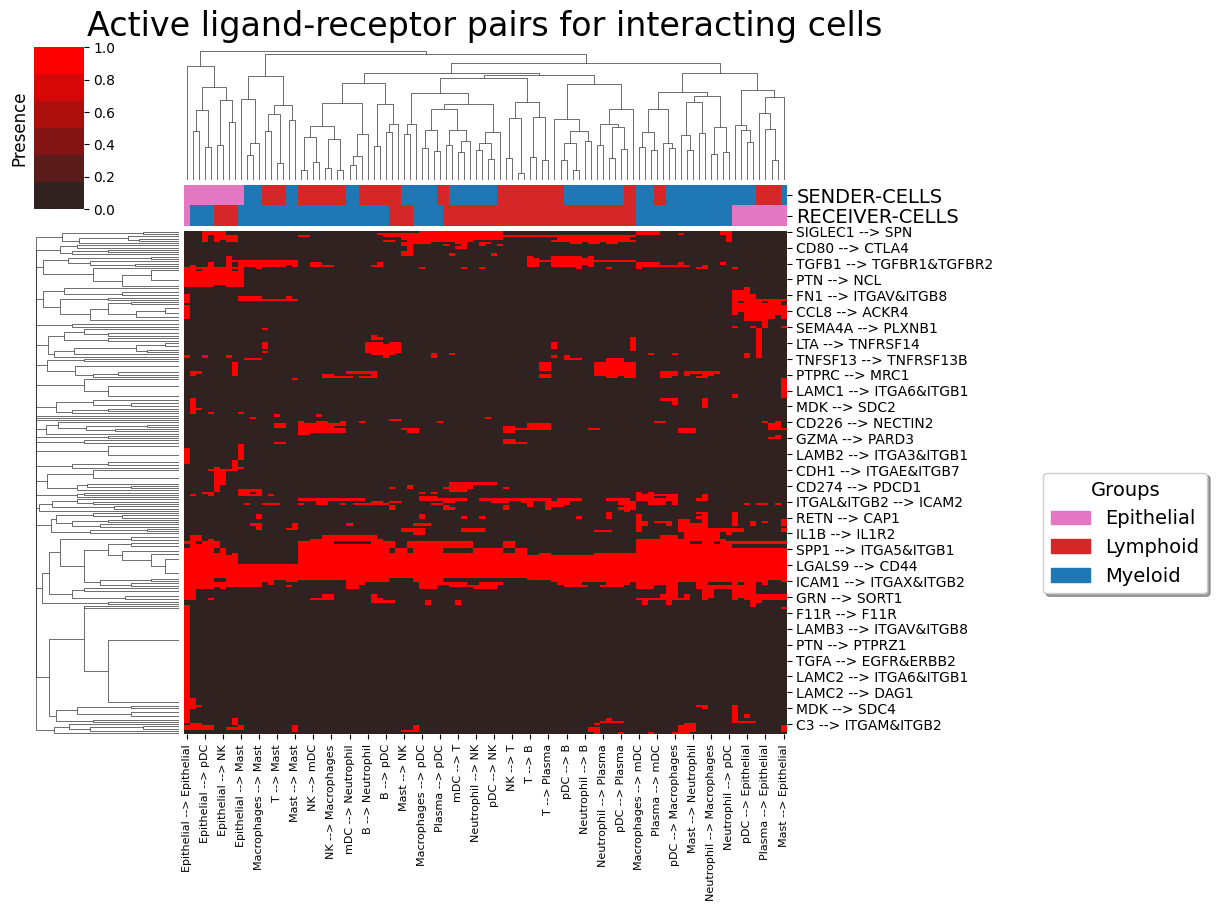

In [24]:
interaction_clustermap = c2c.plotting.clustermap_ccc(interactions,
                                                     metric='jaccard',
                                                     method='complete',
                                                     metadata=group_meta,
                                                     sample_col='Celltype',
                                                     group_col='Group',
                                                     colors=colors,
                                                     row_fontsize=14,
                                                     title='Active ligand-receptor pairs for interacting cells',
                                                     filename=None,
                                                     cell_labels=('SENDER-CELLS', 'RECEIVER-CELLS'),
                                                     **{'figsize' : (10,9),
                                                       }
                                                     )

# Add a legend to know the groups of the sender and receiver cells:
l1 = c2c.plotting.generate_legend(color_dict=colors,
                                  loc='center left',
                                  bbox_to_anchor=(20, -2), # Indicated where to include it
                                  ncol=1, fancybox=True,
                                  shadow=True,
                                  title='Groups',
                                  fontsize=14,
                                 )

### Circos plot

It generates a circos plot, showing the cells producing ligands (sender_cells), according to a list of specific ligands (ligands) to the cells producing receptors (receiver_cells), according to a list of specific receptors (receptors). The order of these lists is preserved in the visualization. Elements that are not used are omitted and therefore not plotted (in this case those with a communication score of 0, specified in 'excluded_score').

In [25]:
sender_cells = ['Epithelial', 'pDC', 'mDC']
receiver_cells = ['Neutrophil', 'NK', 'T', 'B', 'Macrophages']
ligands = ['CCL5',
           'MIF',
           'LAMB2'
          ]
receptors = ['NCL',
             'CD74&CD44',
             'CCR1',
            ]

<Axes: >

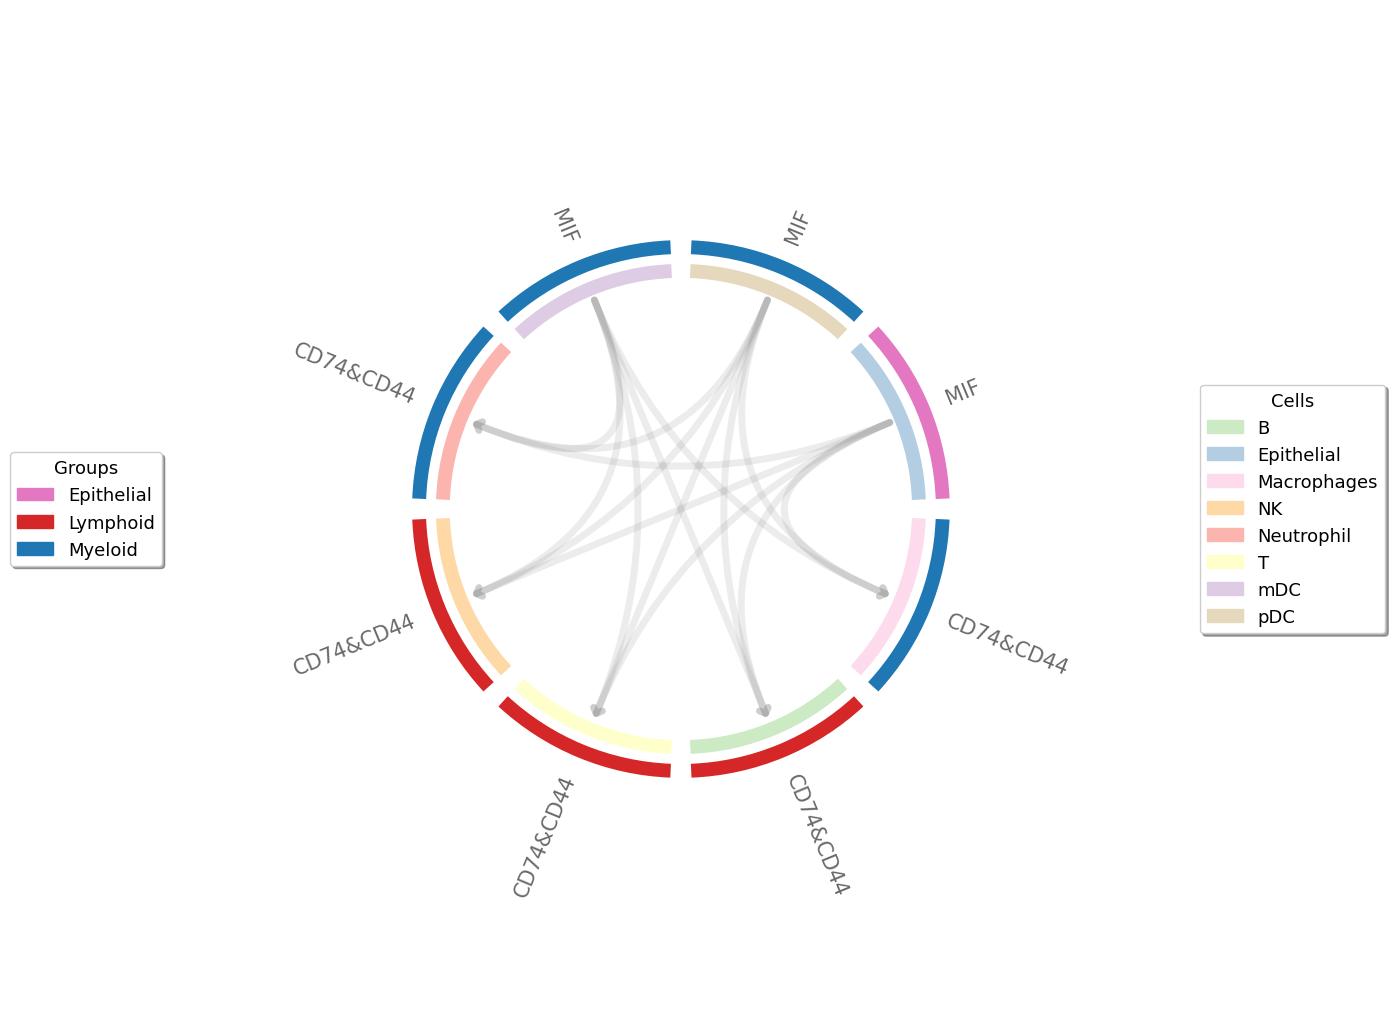

In [26]:
c2c.plotting.circos_plot(interaction_space=interactions,
                         sender_cells=sender_cells,
                         receiver_cells=receiver_cells,
                         ligands=ligands,
                         receptors=receptors,
                         excluded_score=0,
                         metadata=group_meta,
                         sample_col='Celltype',
                         group_col='Group',
                         colors=colors,
                         fontsize=15,
                        )

If we do not pass metadata info, the samples/cell types are only plotted.

We can also change the label colors of ligands and receptors

<Axes: >

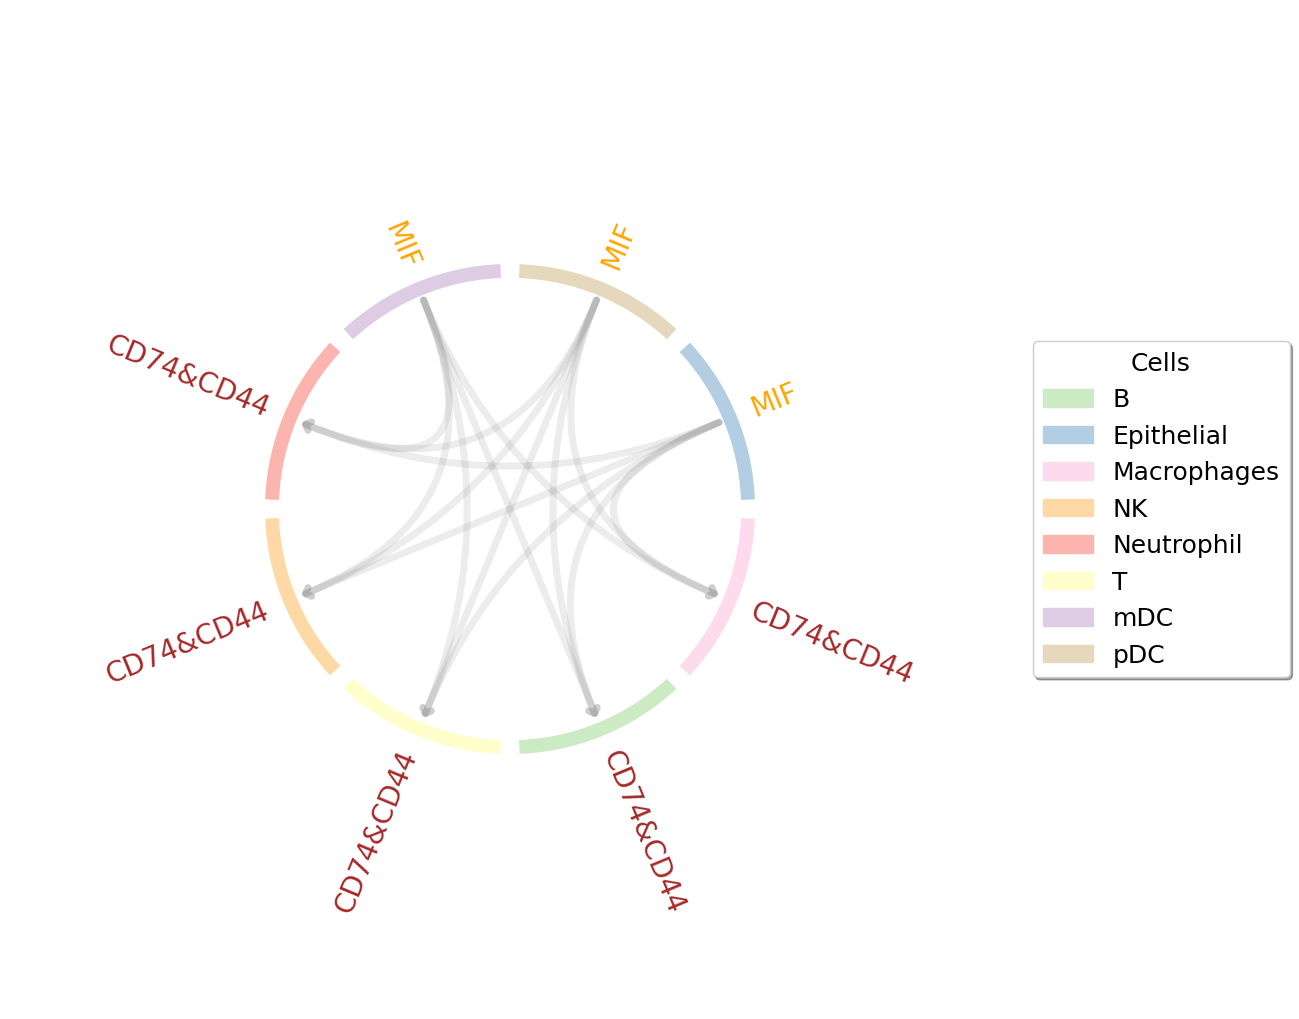

In [27]:
c2c.plotting.circos_plot(interaction_space=interactions,
                         sender_cells=sender_cells,
                         receiver_cells=receiver_cells,
                         ligands=ligands,
                         receptors=receptors,
                         excluded_score=0,
                         fontsize=20,
                         ligand_label_color='orange',
                         receptor_label_color='brown',
                        )

### Dot plot for significance

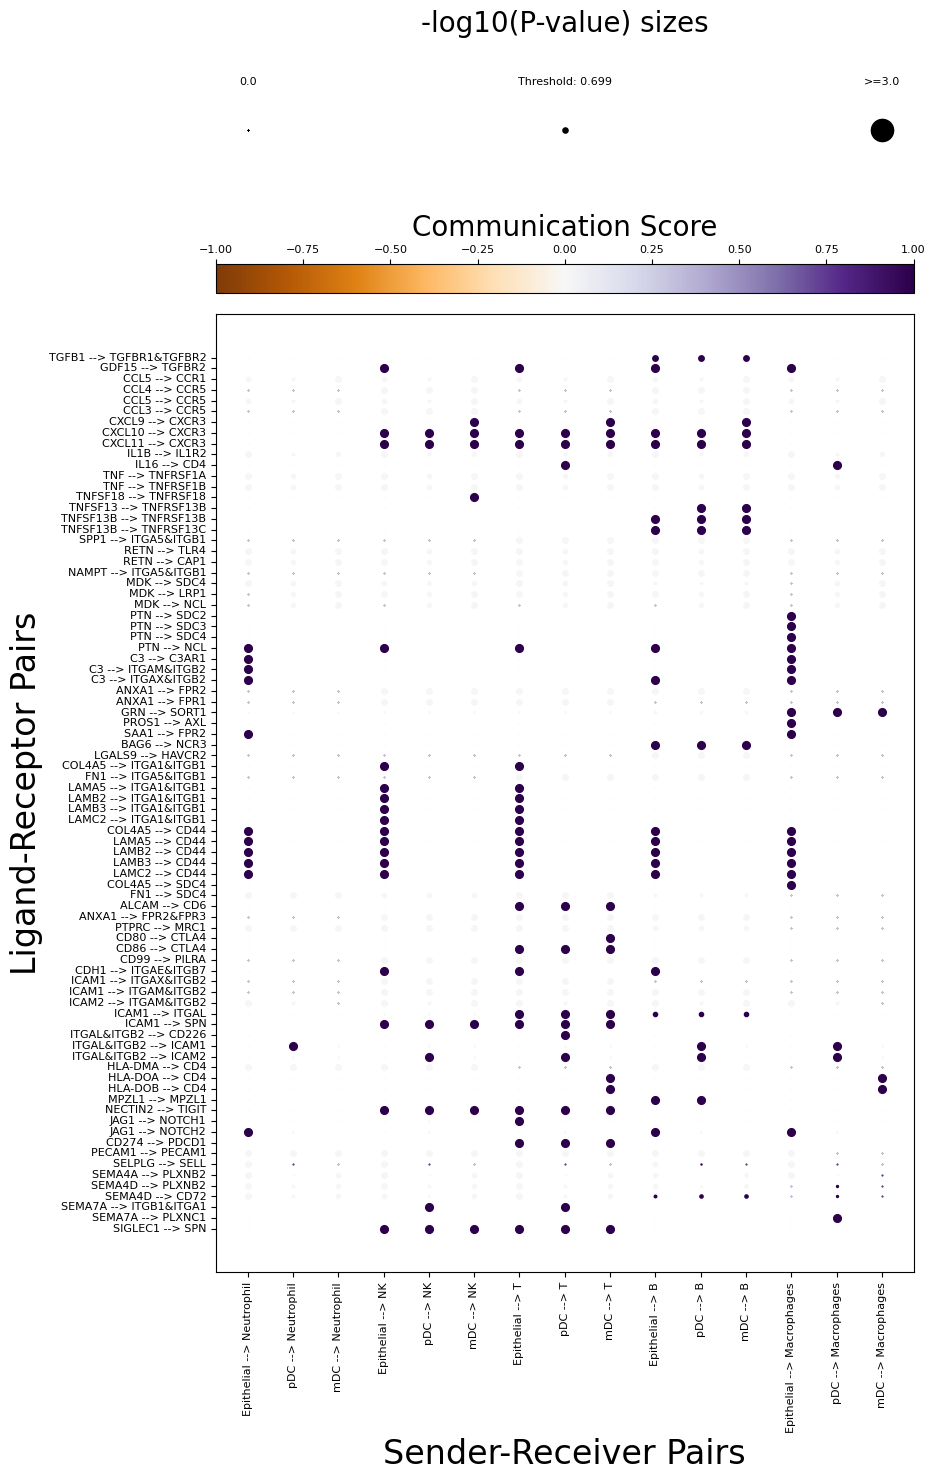

In [28]:
fig = c2c.plotting.dot_plot(interactions,
                            evaluation='communication',
                            significance = 0.2,
                            figsize=(9, 16),
                            cmap='PuOr',
                            senders=sender_cells,
                            receivers=receiver_cells,
                            tick_size=8
                            )

### Visualize CCI scores

Since this case is undirected, a triangular heatmap is plotted instead of the complete one.

Interaction space detected as a Interactions class


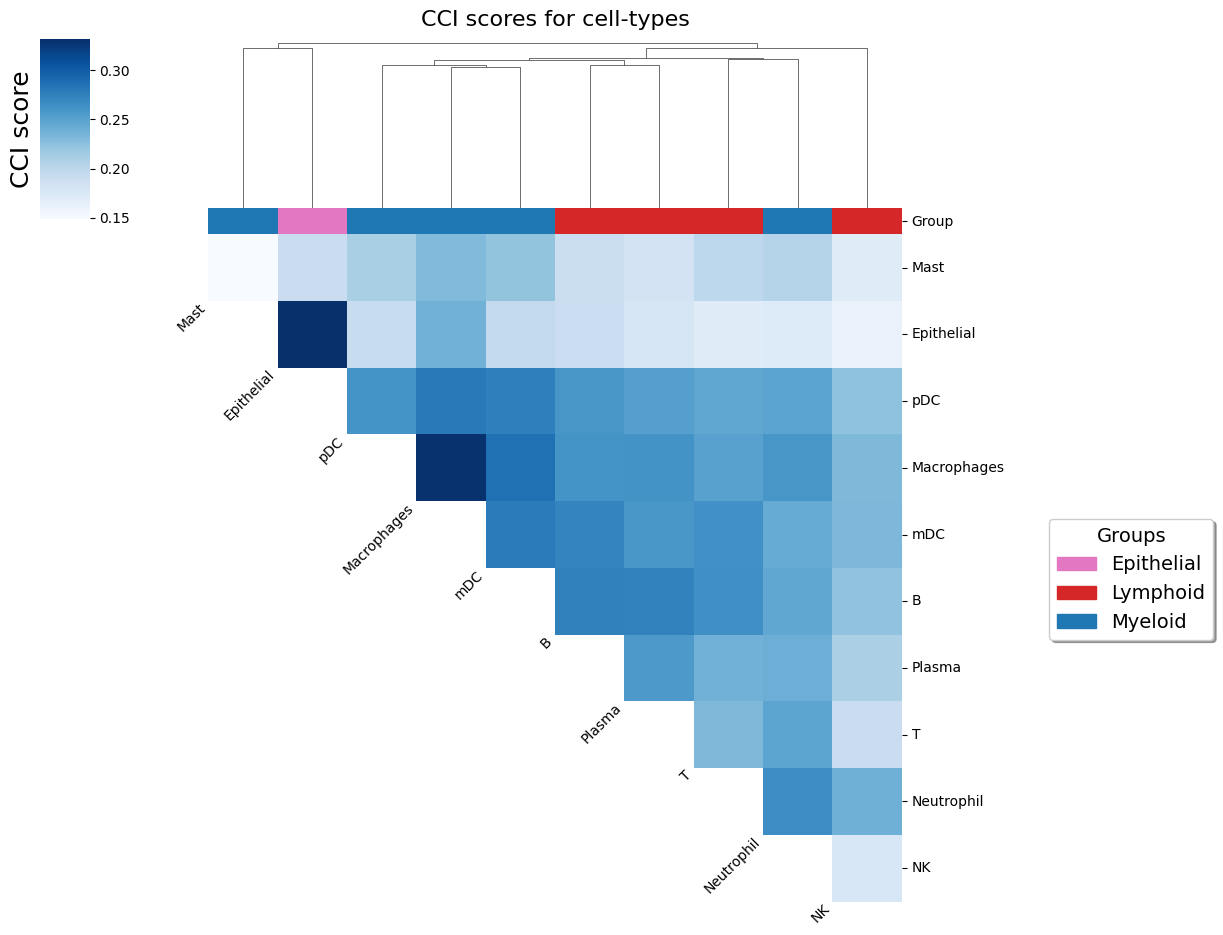

In [29]:
cm = c2c.plotting.clustermap_cci(interactions,
                                 method='complete',
                                 metadata=group_meta,
                                 sample_col="Celltype",
                                 group_col="Group",
                                 colors=colors,
                                 title='CCI scores for cell-types',
                                 cmap='Blues'
                                 )

# Add a legend to know the groups of the sender and receiver cells:
l1 = c2c.plotting.generate_legend(color_dict=colors,
                                  loc='center left',
                                  bbox_to_anchor=(20, -2), # Indicated where to include it
                                  ncol=1, fancybox=True,
                                  shadow=True,
                                  title='Groups',
                                  fontsize=14,
                                 )

### Dot plot for significance

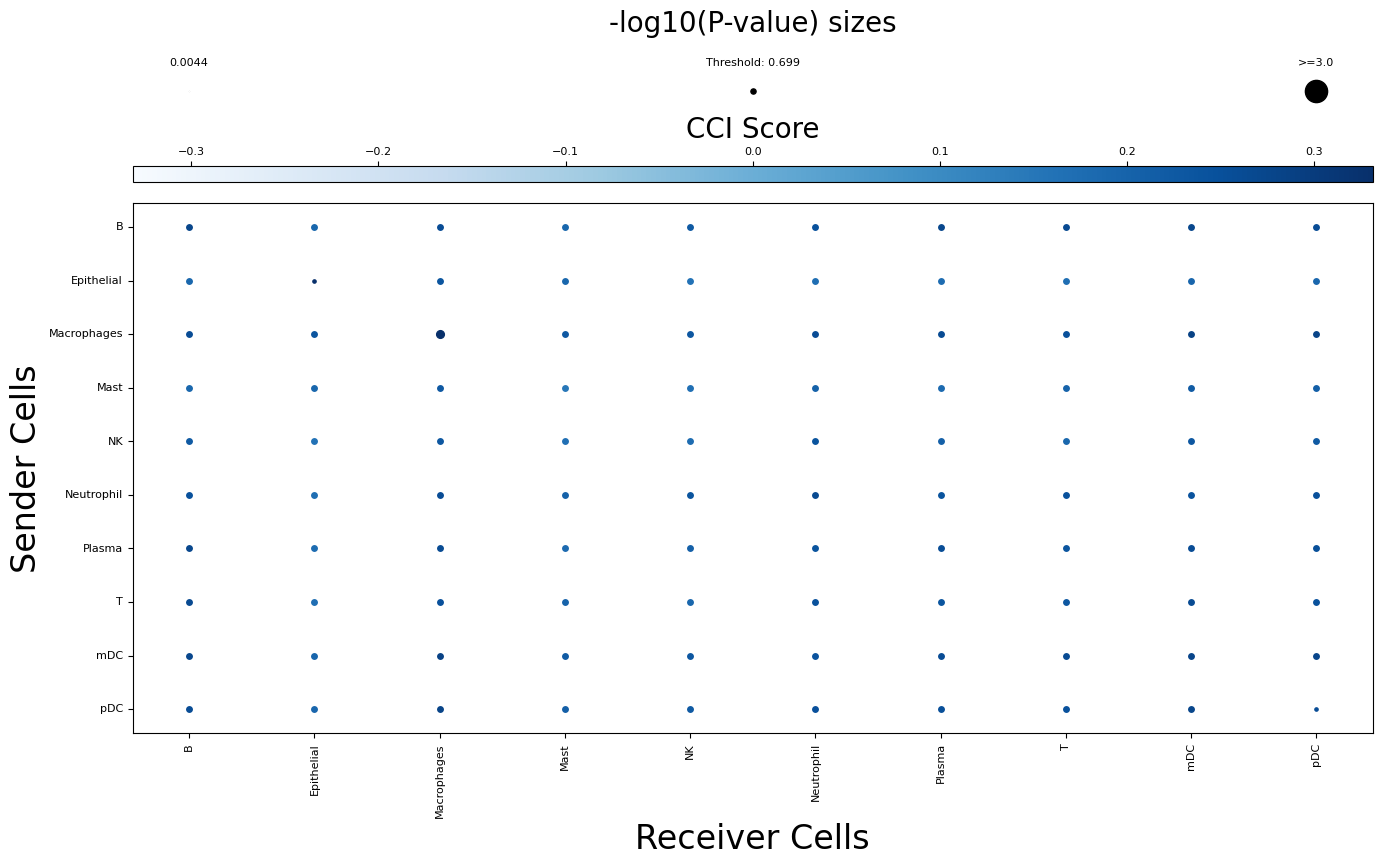

In [30]:
fig = c2c.plotting.dot_plot(interactions,
                            evaluation='interactions',
                            significance = 0.2,
                            figsize=(16, 9),
                            cmap='Blues',
                            )

### Project samples/cells with PCoA into a Euclidean space

We can project the samples/cells given their CCI scores with other cells and see how close they are given their potential of interaction.

**THIS ONLY WORKS WITH UNDIRECTED CCI SCORES**

Interaction space detected as a Interactions class


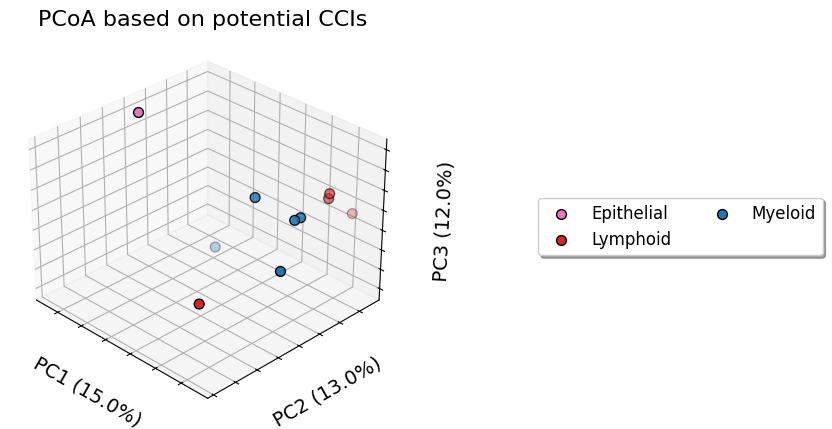

In [31]:
if interactions.analysis_setup['cci_type'] == 'undirected':
        
    pcoa = c2c.plotting.pcoa_3dplot(interactions,
                                    metadata=group_meta,
                                    sample_col="Celltype",
                                    group_col="Group",
                                    title='PCoA based on potential CCIs',
                                    colors=colors,
                                    )

Without metadata

Interaction space detected as a Interactions class


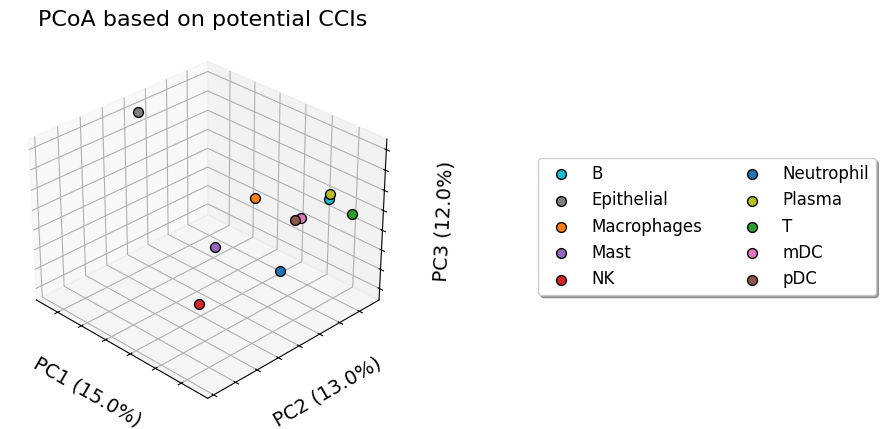

In [32]:
if interactions.analysis_setup['cci_type'] == 'undirected':
    celltype_colors = c2c.plotting.get_colors_from_labels(labels=meta['celltype'].unique().tolist(),
                                                          cmap='tab10'
                                                         )    
    pcoa = c2c.plotting.pcoa_3dplot(interactions,
                                    title='PCoA based on potential CCIs',
                                    colors=celltype_colors,
                                    )